# Mini Project 2

In [1783]:
import sympy as sp
import numpy as np
from spb import plot

## Problem 1

First we define the system specified by eq. 1 in [link](https://learn.inside.dtu.dk/d2l/le/lessons/215964/topics/900115).

In [1769]:
# Define the symbols 
alpha, beta, g, t = sp.symbols('alpha beta g_1 t', real=True)

# Define functions x, z and j as functions of t
x = sp.Function('x')(t)
z = sp.Function('z')(t)
j = sp.Function('j')(t)

# Define the state vector 
X = sp.Matrix([j, x, x.diff(t)])

# define b vector
B = sp.Matrix([1,0,0])

# Define the forcing function
u = g*(z - x)

# Define the system matrix A
A = sp.Matrix([[-alpha, 0, -1],[0, 0, 1], [1, 0, -beta]])

# Define the system as 
X_dot = sp.expand(A*X + B*u)
sys_eq1 = sp.Eq(X.diff(t), X_dot)
sys_eq1

Eq(Matrix([
[     Derivative(j(t), t)],
[     Derivative(x(t), t)],
[Derivative(x(t), (t, 2))]]), Matrix([
[-alpha*j(t) - g_1*x(t) + g_1*z(t) - Derivative(x(t), t)],
[                                    Derivative(x(t), t)],
[                       -beta*Derivative(x(t), t) + j(t)]]))

Now we show that the above equation (sys_eq1) is equivalent to eq. 3 in [link](https://learn.inside.dtu.dk/d2l/le/lessons/215964/topics/900115).

In [1770]:
# Define the system in eq. 3
A_eq3 = sp.Matrix([[-alpha, -g, -1],[0, 0, 1], [1, 0, -beta]])
B = B*g
X_dot_eq3 = sp.expand(A_eq3*X + B*z)
sys_eq3 = sp.Eq(X.diff(t), X_dot_eq3)
sys_eq3

Eq(Matrix([
[     Derivative(j(t), t)],
[     Derivative(x(t), t)],
[Derivative(x(t), (t, 2))]]), Matrix([
[-alpha*j(t) - g_1*x(t) + g_1*z(t) - Derivative(x(t), t)],
[                                    Derivative(x(t), t)],
[                       -beta*Derivative(x(t), t) + j(t)]]))

Test for equality of the sys_eq1 and sys_eq3

In [1771]:
print(f'sys_eq1 = sys_eq3? {sys_eq1 == sys_eq3}')

sys_eq1 = sys_eq3? True


## Problem 2

We define z(t) as the following piecewise function.

In [1772]:
T = sp.Symbol('T', real=True)
z = sp.Piecewise((2*t/T, ((0 <= t) & (t <T/2) )), ((2/T)*(T-t), ((T/2 <= t) & (t < T))))
z

Piecewise((2*t/T, (t >= 0) & (t < T/2)), (2*(T - t)/T, (T > t) & (t >= T/2)))

and plot it on the interval [0, T] for T = 20pi.

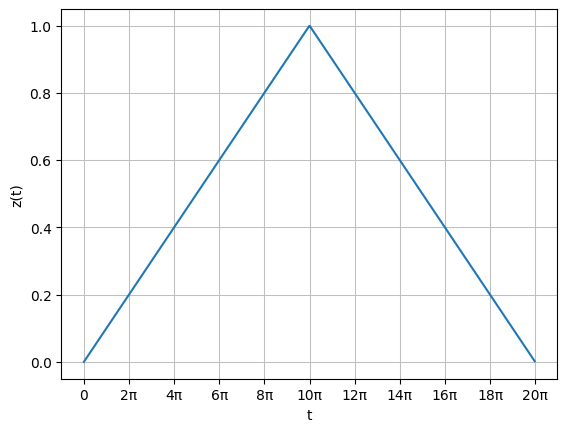

In [1781]:
# Create plot
p = plot(z.subs(T, 20*sp.pi), (t, 0, 20 * sp.pi), ylabel='z(t)', xlabel='t', show=False)
ax = p.ax 
major_ticks = np.arange(0, 21 * np.pi, 2*np.pi) 

# dummy to suppress output
dummy=ax.set_xticks(major_ticks) 
dummy=ax.set_xticklabels([f"{int(t / np.pi)}π" if t != 0 else "0" for t in major_ticks])

## Problem 3

We now determine the transfer function, H(s), for the system sys_eq1 using definition 2.39 from the course text book.

In [1774]:
D = sp.Matrix([0,1,0])
s = sp.symbols('s', complex=True)
H = sp.simplify((-D.T*(A_eq3 - sp.eye(3)*s).inv()*B)[0])
H

g_1/(alpha*beta*s + alpha*s**2 + beta*s**2 + g_1 + s**3 + s)

define on the following interval

In [1775]:
eigenvalues = sp.solve(sp.det(A_eq3 - sp.eye(3)*s), s)
interval = sp.Complement(sp.S.Complexes, sp.FiniteSet(*eigenvalues))
interval

Complement(Complexes, {-alpha/3 - beta/3 - (-3*alpha*beta + (alpha + beta)**2 - 3)/(3*(27*g_1/2 + (alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1)/2 + sqrt((27*g_1 + 2*(alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1))**2 - 4*(-3*alpha*beta + (alpha + beta)**2 - 3)**3)/2)**(1/3)) - (27*g_1/2 + (alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1)/2 + sqrt((27*g_1 + 2*(alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1))**2 - 4*(-3*alpha*beta + (alpha + beta)**2 - 3)**3)/2)**(1/3)/3, -alpha/3 - beta/3 - (-3*alpha*beta + (alpha + beta)**2 - 3)/(3*(-1/2 - sqrt(3)*I/2)*(27*g_1/2 + (alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1)/2 + sqrt((27*g_1 + 2*(alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1))**2 - 4*(-3*alpha*beta + (alpha + beta)**2 - 3)**3)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27*g_1/2 + (alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1)/2 + sqrt((27*g_1 + 2*(alpha + beta)**3 - (9*alpha + 9*beta)*(alpha*beta + 1))**2 - 4*(-3*alpha*beta + (alpha + 

## Problem 4

We now use Fourier's method (Theorem 7.8 in the course text book) and eq. 5 in [link](https://learn.inside.dtu.dk/d2l/le/lessons/215964/topics/900115) to construct the Fourier series for the solution x(t).

In [1776]:
# Define variables
n = sp.symbols('n', integer=True)
w = 2 * sp.pi / T
cn = ((-1)**n - 1) / (sp.pi**2 * n**2)
expr = sp.simplify(cn * sp.exp(sp.I * n * w * t))

# Define the Fourier series of z(t)
z_fourier = sp.Rational(1, 2) + sp.Sum(expr, (n, -sp.oo, -1)) + sp.Sum(expr, (n, 1, sp.oo))  # type: ignore

H_in = H.subs(s,sp.I*n*w)

# Define the Fourier series of x(t)
x = sp.Rational(
    1, 2) + sp.Sum(expr*H_in, (n, -sp.oo, -1)) + sp.Sum(expr*H_in, (n, 1, sp.oo))  # type: ignore
x


Sum(g_1*((-1)**n - 1)*exp(2*I*pi*n*t/T)/(pi**2*n**2*(g_1 + 2*I*pi*alpha*beta*n/T + 2*I*pi*n/T - 4*pi**2*alpha*n**2/T**2 - 4*pi**2*beta*n**2/T**2 - 8*I*pi**3*n**3/T**3)), (n, -oo, -1)) + Sum(g_1*((-1)**n - 1)*exp(2*I*pi*n*t/T)/(pi**2*n**2*(g_1 + 2*I*pi*alpha*beta*n/T + 2*I*pi*n/T - 4*pi**2*alpha*n**2/T**2 - 4*pi**2*beta*n**2/T**2 - 8*I*pi**3*n**3/T**3)), (n, 1, oo)) + 1/2

## Problem 5

We now plot z(t) and x(t) for the following values. 

System is BIBO stable? True


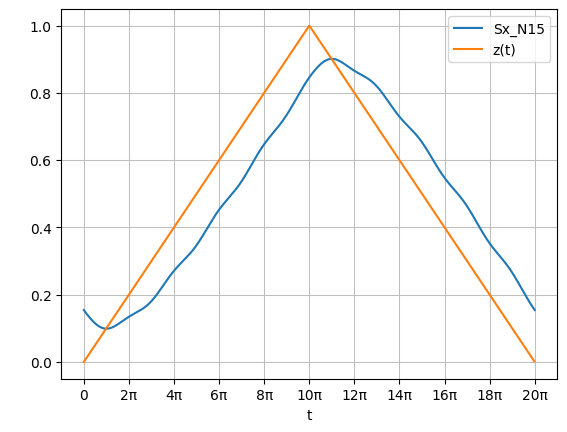

In [ ]:
g_val = 0.2
alpha_val = 0.1
beta_val = 0.1
N_val = 15
T_val = 20*sp.pi

# Asymptotic stability implies BIBO stability so we can check for asymptotic stability to confirm BIBO stability.
print(
    f'System is BIBO stable? {g_val < (alpha_val + beta_val)*(1 + alpha_val*beta_val)}')

# Substitute the values
x_N15 = x.subs(sp.oo, N_val).subs(-sp.oo, -N_val).subs(T,T_val).subs(alpha, alpha_val).subs(beta, beta_val).subs(g, g_val)

# Create plot
p = plot((x_N15.doit()), z.subs(T, 20*sp.pi), (t, 0, 20 * sp.pi),
         ylabel=' ', xlabel='t',legend=True, label=["Sx_N15", "z(t)"], show=False) 

ax = p.ax
major_ticks = np.arange(0, 22 * np.pi, 2*np.pi)

# dummy to unwanted suppress output
dummy = ax.set_xticks(major_ticks)
dummy = ax.set_xticklabels([f"{int(t / np.pi)}π" if t != 0 else "0" for t in major_ticks])

It is clear from the plot that $S^{x}_{N=15}(t)$ does not track $z(t)$ particularly well. This can be improved by increasing the gain parameter $g_1$ at the expense of making the system BIBO unstable.